## Import Libraries

In [1]:
#Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Extract the Data with Pandas

In [2]:
#Create path variable
data = './Data_Resources/globalterrorismdb_0718dist.tar.bz2'

#Create Pandas Dataframe
gt_df = pd.read_csv(data, compression = 'bz2')

#View Dataframe
gt_df

C:\Users\owner\AppData\Local\Temp\ipykernel_7836\1749488315.py:5: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  gt_df = pd.read_csv(data, compression = 'bz2')


,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,181689,201712310031,2017,12,31,NaN,0,NaN,92,India,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
#View Dataframes Properties
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, Unnamed: 0 to related
dtypes: float64(55), int64(23), object(58)
memory usage: 188.5+ MB


In [4]:
#View all df Columns
gt_df.columns.tolist()

['Unnamed: 0',
 'eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',

## Transform the Data to fit the needs of the Analysis

In [5]:
#Create a simplified Dataframe only with the columns needed
gt_df2 = gt_df[['region', 'region_txt', 'iyear', 'success', 'gname', 'motive', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'targtype1_txt', 'nkill', 'nwound', 'eventid']]

#Rename df Columns
gt_df2 = gt_df2.rename(columns = {'region':'Region_Id', 'region_txt':'Region', 
                        'iyear':'Year', 'success':'Success', 'gname':'Group',
                        'motive':'Motive', 'attacktype1_txt':'Attack_Type', 'attacktype1':'Type_Id',
                        'targtype1_txt':'Target', 'weaptype1_txt':'Weapon', 'nkill':'Amount_Killed',
                        'nwound':'Amount_Wounded', 'eventid':'Attack_Id'
                       })

#Check for Duplicates
gt_df2.loc[gt_df2.duplicated(subset = ['Attack_Id'])]

#View new Simplified Dataframe
gt_df2

,Region_Id,Region,Year,Success,Group,Motive,Weapon,Attack_Type,Type_Id,Target,Amount_Killed,Amount_Wounded,Attack_Id
0,2,Central America & Caribbean,1970,1,MANO-D,NaN,Unknown,Assassination,1,Private Citizens & Property,1.0,0.0,197000000001
1,1,North America,1970,1,23rd of September Communist League,NaN,Unknown,Hostage Taking (Kidnapping),6,Government (Diplomatic),0.0,0.0,197000000002
2,5,Southeast Asia,1970,1,Unknown,NaN,Unknown,Assassination,1,Journalists & Media,1.0,0.0,197001000001
3,8,Western Europe,1970,1,Unknown,NaN,Explosives,Bombing/Explosion,3,Government (Diplomatic),NaN,NaN,197001000002
4,4,East Asia,1970,1,Unknown,NaN,Incendiary,Facility/Infrastructure Attack,7,Government (Diplomatic),NaN,NaN,197001000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,11,Sub-Saharan Africa,2017,1,Al-Shabaab,NaN,Firearms,Armed Assault,2,Military,1.0,2.0,201712310022
181687,10,Middle East & North Africa,2017,1,Muslim extremists,NaN,Explosives,Bombing/Explosion,3,Military,2.0,7.0,201712310029
181688,5,Southeast Asia,2017,1,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,Facility/Infrastructure Attack,7,Private Citizens & Property,0.0,0.0,201712310030
181689,6,South Asia,2017,0,Unknown,NaN,Explosives,Bombing/Explosion,3,Government (General),0.0,0.0,201712310031


In [6]:
#View new Dataframe properties
gt_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region_Id       181691 non-null  int64  
 1   Region          181691 non-null  object 
 2   Year            181691 non-null  int64  
 3   Success         181691 non-null  int64  
 4   Group           181691 non-null  object 
 5   Motive          50561 non-null   object 
 6   Weapon          181691 non-null  object 
 7   Attack_Type     181691 non-null  object 
 8   Type_Id         181691 non-null  int64  
 9   Target          181691 non-null  object 
 10  Amount_Killed   171378 non-null  float64
 11  Amount_Wounded  165380 non-null  float64
 12  Attack_Id       181691 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 18.0+ MB


In [7]:
#Seperate the Successful Attacks and Failed Attacks

#Create Successfull Attack df
succ_df = gt_df2.loc[gt_df2['Success'] == 1]

#View Successfull Attack df
succ_df

,Region_Id,Region,Year,Success,Group,Motive,Weapon,Attack_Type,Type_Id,Target,Amount_Killed,Amount_Wounded,Attack_Id
0,2,Central America & Caribbean,1970,1,MANO-D,NaN,Unknown,Assassination,1,Private Citizens & Property,1.0,0.0,197000000001
1,1,North America,1970,1,23rd of September Communist League,NaN,Unknown,Hostage Taking (Kidnapping),6,Government (Diplomatic),0.0,0.0,197000000002
2,5,Southeast Asia,1970,1,Unknown,NaN,Unknown,Assassination,1,Journalists & Media,1.0,0.0,197001000001
3,8,Western Europe,1970,1,Unknown,NaN,Explosives,Bombing/Explosion,3,Government (Diplomatic),NaN,NaN,197001000002
4,4,East Asia,1970,1,Unknown,NaN,Incendiary,Facility/Infrastructure Attack,7,Government (Diplomatic),NaN,NaN,197001000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181684,6,South Asia,2017,1,Zeliangrong United Front,NaN,Firearms,Hostage Taking (Kidnapping),6,Government (General),0.0,0.0,201712310019
181685,6,South Asia,2017,1,Unknown,NaN,Explosives,Bombing/Explosion,3,Business,0.0,4.0,201712310020
181686,11,Sub-Saharan Africa,2017,1,Al-Shabaab,NaN,Firearms,Armed Assault,2,Military,1.0,2.0,201712310022
181687,10,Middle East & North Africa,2017,1,Muslim extremists,NaN,Explosives,Bombing/Explosion,3,Military,2.0,7.0,201712310029


In [8]:
#Create Failed Attack df
fail_df = gt_df2.loc[gt_df2['Success'] == 0]

#View Failed Attack df
fail_df

,Region_Id,Region,Year,Success,Group,Motive,Weapon,Attack_Type,Type_Id,Target,Amount_Killed,Amount_Wounded,Attack_Id
6,3,South America,1970,0,Tupamaros (Uruguay),NaN,Firearms,Assassination,1,Police,0.0,0.0,197001020001
10,1,North America,1970,0,"Weather Underground, Weathermen",NaN,Explosives,Bombing/Explosion,3,Military,0.0,0.0,197001050001
23,1,North America,1970,0,Student Radicals,The incident took place during heightened anti...,Explosives,Bombing/Explosion,3,Military,0.0,0.0,197001190003
39,5,Southeast Asia,1970,0,New People's Army (NPA),NaN,Unknown,Unknown,9,Military,0.0,1.0,197001310001
43,1,North America,1970,0,Unknown,NaN,Incendiary,Facility/Infrastructure Attack,7,Business,0.0,0.0,197002020001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181650,6,South Asia,2017,0,Unknown,NaN,Explosives,Bombing/Explosion,3,Unknown,0.0,0.0,201712300007
181674,10,Middle East & North Africa,2017,0,Islamic State of Iraq and the Levant (ISIL),NaN,Unknown,Unknown,9,Military,5.0,0.0,201712310007
181679,10,Middle East & North Africa,2017,0,Islamic State of Iraq and the Levant (ISIL),NaN,Firearms,Armed Assault,2,Military,13.0,0.0,201712310012
181689,6,South Asia,2017,0,Unknown,NaN,Explosives,Bombing/Explosion,3,Government (General),0.0,0.0,201712310031


In [9]:
#Create a df grouping Attacks by Year
year_df = gt_df2.groupby(['Year'], as_index = True).count()[['Attack_Id']]

#Create Successful Attack Column
year_df['Successful'] = succ_df.groupby(['Year'], as_index = True).count()[['Attack_Id']]

#Create Failed Attack Column
year_df['Failed'] = fail_df.groupby(['Year'], as_index = True).count()[['Attack_Id']]

#View Attacks by Region df
year_df

,Attack_Id,Successful,Failed
Year,,,
1970,651,549,102
1971,471,420,51
1972,568,452,116
1973,473,433,40
1974,581,545,36
1975,740,705,35
1976,923,861,62
1977,1319,1191,128
1978,1526,1411,115


In [10]:
#Create a df grouping Attacks by Region
reg_df = gt_df2.groupby(['Region'], as_index = True).count()[['Attack_Id']]

#Create Successful Attack Column
reg_df['Successful'] = succ_df.groupby(['Region'], as_index = True).count()[['Attack_Id']]

#Create Failed Attack Column
reg_df['Failed'] = fail_df.groupby(['Region'], as_index = True).count()[['Attack_Id']]

#View Attacks by Region df
reg_df

,Attack_Id,Successful,Failed
Region,,,
Australasia & Oceania,282,240,42
Central America & Caribbean,10344,9979,365
Central Asia,563,505,58
East Asia,802,680,122
Eastern Europe,5144,4437,707
Middle East & North Africa,50474,44319,6155
North America,3456,2894,562
South America,18978,17620,1358
South Asia,44974,39369,5605


In [11]:
#Create a df grouping by Year and Region
reg_yr_df = gt_df2[['Year', 'Region', 'Attack_Id']].groupby(['Region', 'Year']).agg({'Attack_Id':'count'})

reg_yr_df

Attack_Id
Region                Year           
Australasia & Oceania 1970          1
                      1971          1
                      1972          8
                      1973          1
                      1974          1
...                               ...
Western Europe        2013        261
                      2014        215
                      2015        333
                      2016        273
                      2017        291

[529 rows x 1 columns]

In [12]:
#Re-Shape the Attack by Year and Region df to make it easier to read
reg_yr_df = reg_yr_df.unstack(level = 0)

#View re-shaped df
reg_yr_df

Attack_Id                                           \
Region Australasia & Oceania Central America & Caribbean Central Asia   
Year                                                                    
1970                     1.0                         7.0          NaN   
1971                     1.0                         5.0          NaN   
1972                     8.0                         3.0          NaN   
1973                     1.0                         6.0          NaN   
1974                     1.0                        11.0          NaN   
1975                     NaN                         9.0          NaN   
1976                     NaN                        45.0          NaN   
1977                     NaN                        24.0          NaN   
1978                     2.0                       199.0          NaN   
1979                     2.0                       609.0          NaN   
1980                     7.0                      1070.0          NaN   
1981                     3.0                      1148.0          NaN   
1982                     2.0                       996.0          NaN   
1983                     NaN                       858.0          NaN   
1984                    11.0                       681.0          NaN   
1985                     7.0                       780.0          NaN   
1986                     4.0                       393.0          NaN   
1987                     3.0                       566.0          NaN   
1988                    12.0                       495.0          NaN   
1989                    29.0                       503.0          NaN   
1990                    18.0                       316.0          NaN   
1991                    10.0                       729.0          7.0   
1992                    17.0                       212.0         77.0   
1994                    14.0                       180.0         65.0   
1995                    18.0                       168.0         55.0   
1996                    19.0                       116.0         33.0   
1997                     7.0                       117.0         49.0   
1998                     6.0                         1.0         25.0   
1999                     4.0                         8.0         24.0   
2000                     6.0                        14.0         21.0   
2001                     4.0                         8.0         18.0   
2002                     2.0                         3.0          6.0   
2003                     4.0                         8.0          7.0   
2004                     NaN                         5.0          8.0   
2005                     NaN                         3.0         11.0   
2006                     2.0                         5.0          6.0   
2007                     1.0                         4.0          4.0   
2008                     8.0                         NaN         36.0   
2009                     1.0                         9.0         31.0   
2010                     1.0                         1.0          9.0   
2011                     NaN                         1.0          9.0   
2012                     NaN                         1.0         12.0   
2013                     1.0                        14.0          7.0   
2014                     9.0                         5.0          9.0   
2015                    14.0                         1.0         10.0   
2016                    10.0                         3.0         17.0   
2017                    12.0                         4.0          7.0   

                                                                          \
Region East Asia Eastern Europe Middle East & North Africa North America   
Year                                                                       
1970         2.0           12.0                       28.0         472.0   
1971         1.0            5.0                       55.0      

In [16]:
#Df for Deliverable 1
atck_yr_df = gt_df2.groupby(['Year'], as_index = True).count()[['Attack_Id']]

#Replace NaN Values with Zeros
reg_yr_df = reg_yr_df.fillna(0)

#Create an Avg Column to see Global Average compared by region 
reg_yr_df['Global_Average'] = reg_yr_df.mean(axis = 1)

#View New Global Average Column
reg_yr_df

Attack_Id                                           \
Region Australasia & Oceania Central America & Caribbean Central Asia   
Year                                                                    
1970                     1.0                         7.0          0.0   
1971                     1.0                         5.0          0.0   
1972                     8.0                         3.0          0.0   
1973                     1.0                         6.0          0.0   
1974                     1.0                        11.0          0.0   
1975                     0.0                         9.0          0.0   
1976                     0.0                        45.0          0.0   
1977                     0.0                        24.0          0.0   
1978                     2.0                       199.0          0.0   
1979                     2.0                       609.0          0.0   
1980                     7.0                      1070.0          0.0   
1981                     3.0                      1148.0          0.0   
1982                     2.0                       996.0          0.0   
1983                     0.0                       858.0          0.0   
1984                    11.0                       681.0          0.0   
1985                     7.0                       780.0          0.0   
1986                     4.0                       393.0          0.0   
1987                     3.0                       566.0          0.0   
1988                    12.0                       495.0          0.0   
1989                    29.0                       503.0          0.0   
1990                    18.0                       316.0          0.0   
1991                    10.0                       729.0          7.0   
1992                    17.0                       212.0         77.0   
1994                    14.0                       180.0         65.0   
1995                    18.0                       168.0         55.0   
1996                    19.0                       116.0         33.0   
1997                     7.0                       117.0         49.0   
1998                     6.0                         1.0         25.0   
1999                     4.0                         8.0         24.0   
2000                     6.0                        14.0         21.0   
2001                     4.0                         8.0         18.0   
2002                     2.0                         3.0          6.0   
2003                     4.0                         8.0          7.0   
2004                     0.0                         5.0          8.0   
2005                     0.0                         3.0         11.0   
2006                     2.0                         5.0          6.0   
2007                     1.0                         4.0          4.0   
2008                     8.0                         0.0         36.0   
2009                     1.0                         9.0         31.0   
2010                     1.0                         1.0          9.0   
2011                     0.0                         1.0          9.0   
2012                     0.0                         1.0         12.0   
2013                     1.0                        14.0          7.0   
2014                     9.0                         5.0          9.0   
2015                    14.0                         1.0         10.0   
2016                    10.0                         3.0         17.0   
2017                    12.0                         4.0          7.0   

                                                                          \
Region East Asia Eastern Europe Middle East & North Africa North America   
Year                                                                       
1970         2.0           12.0                       28.0         472.0   
1971         1.0            5.0                       55.0      

In [17]:
#Df for Deliverable 2

#Create a df viewing Incident Casualty Correlation
cslt_df = gt_df2[['Year', 'Region', 'Attack_Id', 'Amount_Killed']].groupby(['Region', 'Year']).agg({'Attack_Id':'count', 'Amount_Killed':'sum'})

#Re-Shape df
cslt_df = cslt_df.unstack(level = 0)

#Fillna with zeros
cslt_df = cslt_df.fillna(0)

#View df
cslt_df.head()

Attack_Id                                           \
Region Australasia & Oceania Central America & Caribbean Central Asia   
Year                                                                    
1970                     1.0                         7.0          0.0   
1971                     1.0                         5.0          0.0   
1972                     8.0                         3.0          0.0   
1973                     1.0                         6.0          0.0   
1974                     1.0                        11.0          0.0   

                                                                          \
Region East Asia Eastern Europe Middle East & North Africa North America   
Year                                                                       
1970         2.0           12.0                       28.0         472.0   
1971         1.0            5.0                       55.0         247.0   
1972         0.0            1.0                       53.0          73.0   
1973         2.0            1.0                       19.0          64.0   
1974         4.0            2.0                       42.0         111.0   

                                                ... Amount_Killed            \
Region South America South Asia Southeast Asia  ...  Central Asia East Asia   
Year                                            ...                           
1970            65.0        1.0           10.0  ...           0.0       0.0   
1971            24.0        0.0            6.0  ...           0.0      25.0   
1972            33.0        1.0           16.0  ...           0.0       0.0   
1973            83.0        1.0            2.0  ...           0.0       0.0   
1974            81.0        2.0            3.0  ...           0.0       1.0   

                                                                              \
Region Eastern Europe Middle East & North Africa North America South America   
Year                                                                           
1970              0.0                        1.0          34.0          11.0   
1971              0.0                        7.0          20.0           6.0   
1972             26.0                       33.0          11.0           6.0   
1973              1.0                        7.0          46.0          16.0   
1974              1.0                       81.0          18.0          21.0   

                                                                    
Region South Asia Southeast Asia Sub-Saharan Africa Western Europe  
Year                                                                
1970          4.0           41.0                1.0           79.0  
1971          0.0            2.0                1.0          112.0  
1972          0.0           84.0                0.0          405.0  
1973          0.0            0.0                5.0          295.0  
1974          0.0            5.0                4.0          408.0  

[5 rows x 24 columns]

In [18]:
#Df for Deliverable 3

#Create a df grouping Attacks by Type
type_df = gt_df2[['Year', 'Region', 'Attack_Type']].groupby(['Region', 'Year', 'Attack_Type']).agg({'Attack_Type':'count'})

#Re-Shape df to make it easier to read
type_df = type_df.unstack(level = 0)

#Fill NaN Values with Zeros
type_df = type_df.fillna(0)

#Create Global Total Column to view Global total for each type of Attack
type_df['Global_Total'] = type_df.sum(axis = 1)

#View Attacks by Type df
type_df

Attack_Type  \
Region                                   Australasia & Oceania   
Year Attack_Type                                                 
1970 Armed Assault                                         0.0   
     Assassination                                         0.0   
     Bombing/Explosion                                     1.0   
     Facility/Infrastructure Attack                        0.0   
     Hijacking                                             0.0   
...                                                        ...   
2017 Hijacking                                             0.0   
     Hostage Taking (Barricade Incident)                   1.0   
     Hostage Taking (Kidnapping)                           2.0   
     Unarmed Assault                                       1.0   
     Unknown                                               0.0   

                                                                      \
Region                                   Central America & Caribbean   
Year Attack_Type                                                       
1970 Armed Assault                                               0.0   
     Assassination                                               2.0   
     Bombing/Explosion                                           0.0   
     Facility/Infrastructure Attack                              0.0   
     Hijacking                                                   0.0   
...                                                              ...   
2017 Hijacking                                                   0.0   
     Hostage Taking (Barricade Incident)                         0.0   
     Hostage Taking (Kidnapping)                                 0.0   
     Unarmed Assault                                             0.0   
     Unknown                                                     0.0   

                                                                 \
Region                                   Central Asia East Asia   
Year Attack_Type                                                  
1970 Armed Assault                                0.0       0.0   
     Assassination                                0.0       0.0   
     Bombing/Explosion                            0.0       0.0   
     Facility/Infrastructure Attack               0.0       1.0   
     Hijacking                                    0.0       1.0   
...                                               ...       ...   
2017 Hijacking                                    0.0       0.0   
     Hostage Taking (Barricade Incident)          0.0       0.0   
     Hostage Taking (Kidnapping)                  0.0       0.0   
     Unarmed Assault                              0.0       0.0   
     Unknown                                      1.0       0.0   

                                                         \
Region                                   Eastern Europe   
Year Attack_Type                                          
1970 Armed Assault                                  0.0   
     Assassination                                  0.0   
     Bombing/Explosion                              8.0   
     Facility/Infrastructure Attack                 4.0   
     Hijacking                                      0.0   
...                                                 ...   
2017 Hijacking                                      0.0   
     Hostage Taking (Barricade Incident)            1.0   
     Hostage Taking (Kidnapping)                    4.0   
     Unarmed Assault                                5.0   
     Unknown                                        2.0   

                                                                     \
Region                                   Middle East & North Africa   
Year Attack_Type                                                      
1970 Armed Assault                                              4.0   
     Assassination                                              1.0

## Tell a story with the Data

## Deliverable 1:
####   Q1.) How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?

<AxesSubplot:title={'center':'Terrorist Attacks by Year 1970 - 2017'}, xlabel='Year', ylabel='Amount of Attacks'>

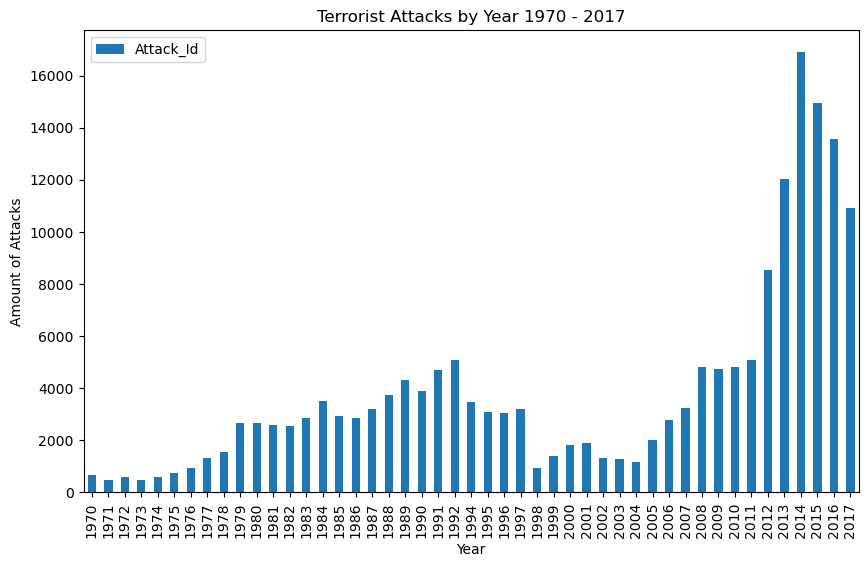

In [20]:
atck_yr_df.plot.bar(xlabel = 'Year', ylabel = 'Amount of Attacks', title = 'Terrorist Attacks by Year 1970 - 2017', figsize = (10, 6))

<AxesSubplot:title={'center':'Terrorist Attacks by Year 1970 - 2017'}, xlabel='Year', ylabel='Amount of Attacks'>

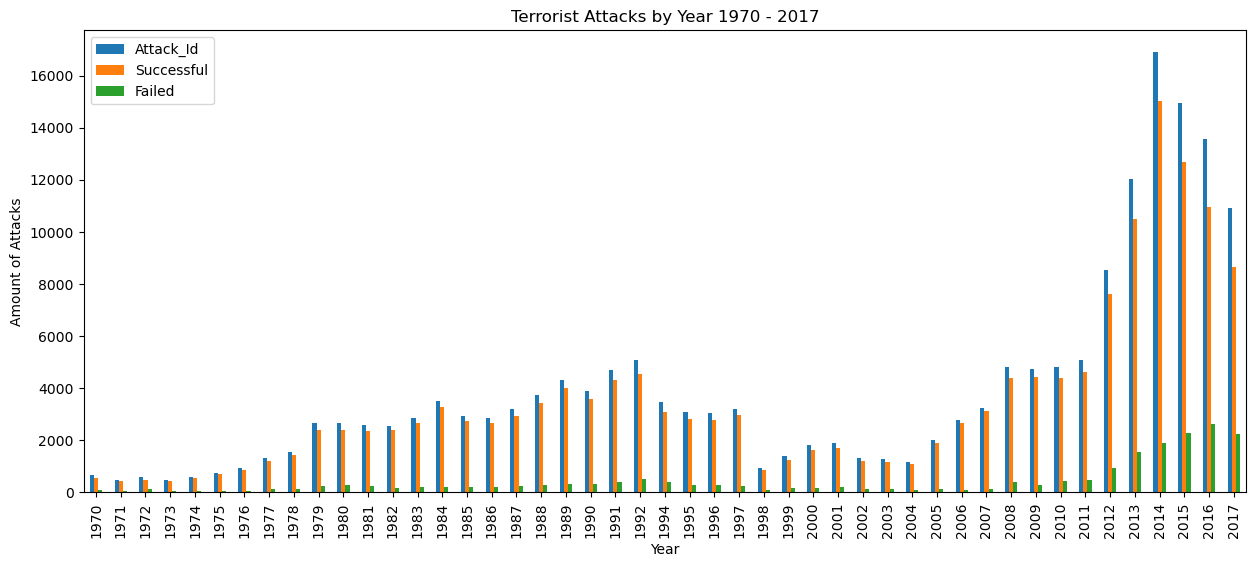

In [23]:
year_df.plot.bar(xlabel = 'Year', ylabel = 'Amount of Attacks', title = 'Terrorist Attacks by Year 1970 - 2017', figsize = (15, 6))

<AxesSubplot:title={'center':'Terrorist Attacks by Region'}, xlabel='Year', ylabel='Attack_Id'>

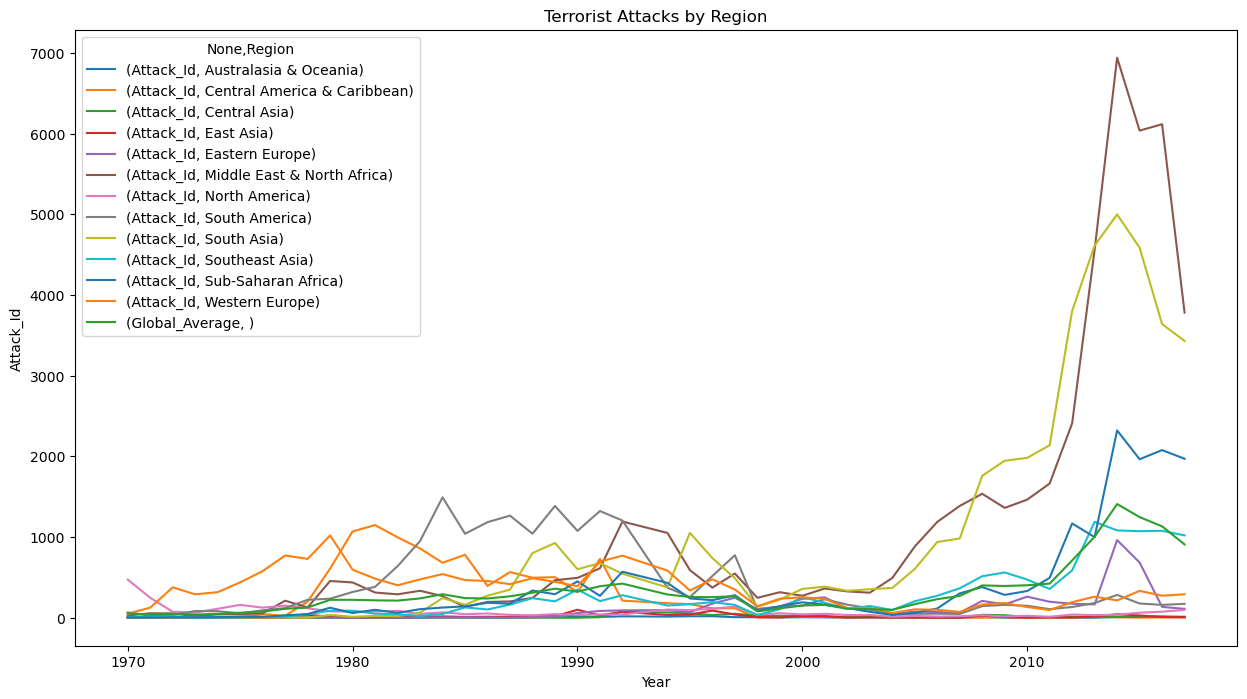

In [27]:
reg_yr_df.plot.line(xlabel = 'Year', ylabel = 'Attack_Id', title = 'Terrorist Attacks by Region', figsize = (15,8))

#### A1.) Yes